In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv(r'C:\Users\sigen\Desktop\diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# Data Cleaning
df = df[df['Glucose'] !=0]
df = df[df['BloodPressure'] !=0]
df = df[df['SkinThickness'] !=0]
df = df[df['Insulin'] !=0]
df = df[df['BMI'] !=0]


In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1

In [5]:
# EDA
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   392.000000  392.000000     392.000000     392.000000  392.000000   
mean      3.301020  122.627551      70.663265      29.145408  156.056122   
std       3.211424   30.860781      12.496092      10.516424  118.841690   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      21.000000   76.750000   
50%       2.000000  119.000000      70.000000      29.000000  125.500000   
75%       5.000000  143.000000      78.000000      37.000000  190.000000   
max      17.000000  198.000000     110.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  392.000000                392.000000  392.000000  392.000000  
mean    33.086224                  0.523046   30.864796    0.331633  
std      7.027659                  0.345488   10.200777    0.471401  
min     18.200000                  0.085000   21.000000    0.000000  
25%     28.400000                  0.269750   23.000000    0.000000  
50%     33.200000                  0.449500   27.000000    0.000000  
75%     37.100000                  0.687000   36.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

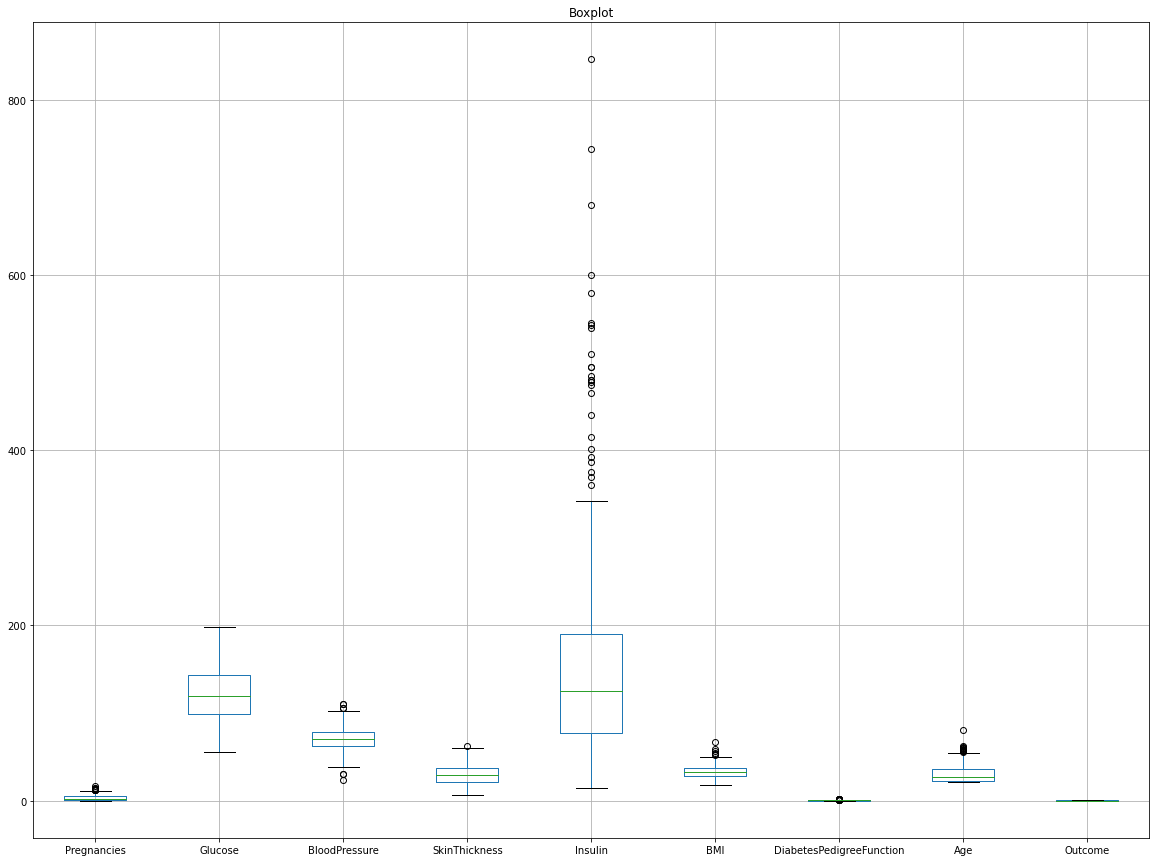

In [6]:
df.plot.box(title="Boxplot", figsize=(20, 15), grid=True)
plt.show(block=True)

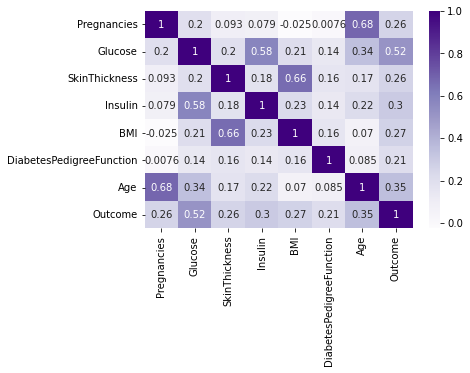

In [7]:
df[["Pregnancies", "Glucose", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr()
sb.heatmap(df[["Pregnancies", "Glucose", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot=True, cmap="Purples")
plt.show()

In [8]:
# T-test
import researchpy as rp
import scipy.stats as stats
from scipy import stats

In [10]:
tStat, pValue = stats.ttest_ind(df['BloodPressure'][df['Outcome'] == 0], df['BloodPressure'][df['Outcome'] == 1], equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.00021311464802764178 T-Statistic:-3.7610252808184734


In [11]:
# MLR
X = df[["Pregnancies", "Glucose", "Outcome", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = df["BloodPressure"]

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as smodel
lm = linear_model.LinearRegression()
lm.fit(X, y)
X = smodel.add_constant(X) 
l_m = smodel.OLS(y, X).fit()
summary = l_m.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     11.10
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           3.94e-14
Time:                        22:37:05   Log-Likelihood:                -1504.8
No. Observations:                 392   AIC:                             3028.
Df Residuals:                     383   BIC:                             3063.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
new_summary = smodel.OLS(y_train, X_train).fit().summary()
print(new_summary)

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     10.16
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.40e-12
Time:                        22:37:32   Log-Likelihood:                -1188.2
No. Observations:                 313   AIC:                             2394.
Df Residuals:                     304   BIC:                             2428.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
dataframe = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dataframe

Actual  Predicted
296      70  65.144558
545      90  76.182146
142      52  68.652288
723      86  79.193661
644      72  64.773381
..      ...        ...
208      64  67.802901
135      60  73.036745
120      76  81.248018
508      50  64.744626
421      68  63.560804

[79 rows x 2 columns]

In [17]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 10.060858412505775
MSE: 170.9920161258459
RMSE: 13.076391556000681


In [18]:
# ANOVA
adf=df[['Age','BloodPressure']]
adf.head(20)
max(df["Age"])

81

In [19]:
Category = pd.cut(adf.Age,bins=[20,39,59,85],labels=["Adult", "Middle Age Adult", "Senior Adult"])
adf.insert(0, "AgeGroup", Category)
to_drop = ['Age']
adf.drop(columns=to_drop, inplace=True)
adf.head()

C:\Users\sigen\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


AgeGroup  BloodPressure
3              Adult             66
4              Adult             40
6              Adult             50
8   Middle Age Adult             70
13  Middle Age Adult             60

In [20]:
adf.head(20)

AgeGroup  BloodPressure
3              Adult             66
4              Adult             40
6              Adult             50
8   Middle Age Adult             70
13  Middle Age Adult             60
14  Middle Age Adult             72
16             Adult             84
18             Adult             30
19             Adult             70
20             Adult             88
24  Middle Age Adult             94
25  Middle Age Adult             70
27             Adult             66
28  Middle Age Adult             82
31             Adult             76
32             Adult             58
35             Adult             60
39  Middle Age Adult             72
40             Adult             64
43  Middle Age Adult            110

In [21]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [22]:
lm = sfa.ols('BloodPressure ~ C(AgeGroup)', data=adf).fit()

In [23]:
(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BloodPressure   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     15.82
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.47e-07
Time:                        22:38:16   Log-Likelihood:                -1530.4
No. Observations:                 392   AIC:                             3067.
Df Residuals:                     389   BIC:                             3079.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          69.0000      0.678    101.810      0.000      67.668      70.332
C(AgeGroup)[T.Middle Age Adult]     8.8592      1.582      5.599      0.000       5.748      11.970
C(AgeGroup)[T.Senior Adult]         4.6000      5.430      0.847      0.397      -6.076      15.276
==============================================================================
Omnibus:                        5.322   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                7.224
Skew:                          -0.039   Prob(JB):                       0.0270
Kurtosis:                       3.660   Cond. No.                         9.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
table = sa.stats.anova_lm(lm)
print(table)

                df        sum_sq      mean_sq          F        PR(>F)
C(AgeGroup)    2.0   4593.759471  2296.879736  15.824617  2.470231e-07
Residual     389.0  56461.791549   145.145994        NaN           NaN


In [26]:
# Post Hoc Test
sp.posthoc_ttest(adf, val_col='BloodPressure', group_col='AgeGroup', p_adjust='holm')

Adult  Middle Age Adult  Senior Adult
Adult             1.000000e+00      1.261676e-07       0.78065
Middle Age Adult  1.261676e-07      1.000000e+00       0.78065
Senior Adult      7.806503e-01      7.806503e-01       1.00000

In [27]:
# ANCOVA
ndf = df[['Age','BMI', 'BloodPressure']]
ndf.head(20)

Age   BMI  BloodPressure
3    21  28.1             66
4    33  43.1             40
6    26  31.0             50
8    53  30.5             70
13   59  30.1             60
14   51  25.8             72
16   31  45.8             84
18   33  43.3             30
19   32  34.6             70
20   27  39.3             88
24   51  36.6             94
25   41  31.1             70
27   22  23.2             66
28   57  22.2             82
31   28  31.6             76
32   22  24.8             58
35   33  24.0             60
39   56  37.1             72
40   26  34.0             64
43   54  45.4            110

In [28]:
new_category = pd.cut(ndf.Age,bins=[20,39,59,85],labels=["Adult", "Middle Age Adult", "Senior Adult"])
ndf.insert(0, "AgeGroup", new_category)
drop = ['Age']
ndf.drop(columns=drop, inplace=True)
ndf.head(20)

C:\Users\sigen\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


AgeGroup   BMI  BloodPressure
3              Adult  28.1             66
4              Adult  43.1             40
6              Adult  31.0             50
8   Middle Age Adult  30.5             70
13  Middle Age Adult  30.1             60
14  Middle Age Adult  25.8             72
16             Adult  45.8             84
18             Adult  43.3             30
19             Adult  34.6             70
20             Adult  39.3             88
24  Middle Age Adult  36.6             94
25  Middle Age Adult  31.1             70
27             Adult  23.2             66
28  Middle Age Adult  22.2             82
31             Adult  31.6             76
32             Adult  24.8             58
35             Adult  24.0             60
39  Middle Age Adult  37.1             72
40             Adult  34.0             64
43  Middle Age Adult  45.4            110

In [29]:
from dfply import *

In [30]:
ndf >> group_by(X.AgeGroup) >> summarize(n=X['BloodPressure'].count(), mean =X['BloodPressure'].mean(), std =X['BloodPressure'].std())

AgeGroup    n       mean        std
0             Adult  316  69.000000  12.352495
1  Middle Age Adult   71  77.859155  10.627855
2      Senior Adult    5  73.600000  11.081516

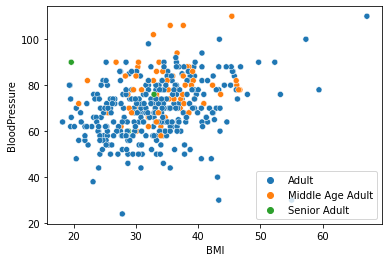

In [31]:
sb.scatterplot(data=ndf,x="BMI",y="BloodPressure",hue=ndf.AgeGroup.tolist())

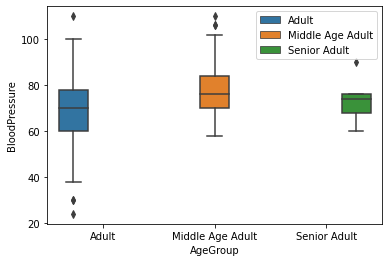

In [32]:
sb.boxplot(data=ndf,x="AgeGroup",y="BloodPressure",hue=ndf.AgeGroup.tolist())

In [33]:
from pingouin import ancova
ancova(data=ndf,dv='BloodPressure',covar='BMI',between='AgeGroup')

Source            SS   DF          F         p-unc       np2
0  AgeGroup   3945.658769    2  14.877009  5.953213e-07  0.071224
1       BMI   5009.392790    1  37.775584  1.971273e-09  0.088722
2  Residual  51452.398759  388        NaN           NaN       NaN

In [34]:
# Power Analysis
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

In [35]:
effect_size = 0.2
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 393.41


In [36]:
effect_size = 0.5
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 63.77


In [37]:
effect_size = 0.8
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


<Figure size 432x288 with 0 Axes>

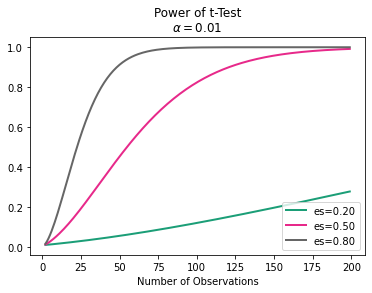

In [38]:
fig = plt.figure()
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')

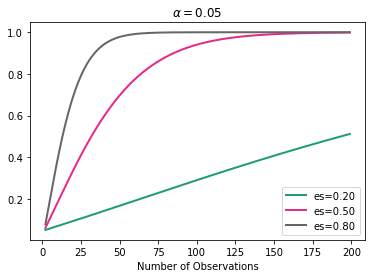

In [39]:
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 title=r'$\alpha = 0.05$') 